In [42]:
import numpy as np
import functools
import jax
from jax import vmap
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.utils import check_random_state
from time import time

In [ ]:
# @functools.partial(vmap, in_axes=(0, None, None))
def interp(x, xp, fp):
    # First we find the nearest neighbour
    ind = np.argmin((x - xp) ** 2)

    # Perform linear interpolation
    ind = np.clip(ind, 1, len(xp) - 2)
    print(ind)

    xi = xp[ind]
    # Figure out if we are on the right or the left of nearest
    s = np.sign(np.clip(x, xp[1], xp[-2]) - xi).astype(np.int64)
    a = (fp[ind + np.copysign(1, s).astype(np.int64)] - fp[ind]) / (
        xp[ind + np.copysign(1, s).astype(np.int64)] - xp[ind]
    )
    b = fp[ind] - a * xp[ind]
    return a * x + b

In [ ]:
t = np.linspace(0, np.pi, 10, endpoint=False)
s = np.sin(t)
# t2 = np.linspace(0, np.pi, 100, endpoint=False)
# s2 = interp(t2, t, s)
t2 = 1.8
s2 = interp(t2, t, s)

In [ ]:
plt.plot(t, s)
plt.plot(t2, s2, 'o', c="red")

In [ ]:
def power(x, n):
    return x ** n

a = np.arange(5)
power(a, 3)

In the end, we will have a nd.array object S of shape (m, p, n_concat, n), and dilations A and shifts B of shape (m, p). We want to apply interpolation on the last axis of S, using scalars a and b. 


In [ ]:
def interp_final(T_ab, t, S_list):
    """_summary_

    Args:
        T_ab: nd.array of shape (m, p, n)
        t: nd.array of shape (n,)
        S_list: nd.array of shape (m, p, n_concat, n)
    """

In [ ]:
# base_numbers = [2, 4, 6, 8, 10]
base_numbers = np.arange(10).reshape((2, 5))
powers = [1, 2, 3, 4, 5]
# powers = np.arange(10).reshape((2, 5))

numbers_powers = np.array(list(map(pow, base_numbers, powers)))

print(numbers_powers)

In [ ]:
def apply_dilation_shift_2d(S, dilations, shifts, max_dilation=1., max_shift=0., shift_before_dilation=True):
    p, n = S.shape
    assert dilations.shape == shifts.shape == (p,)
    ...

def apply_dilation_shift_3d(S, dilations, shifts, max_dilation=1., max_shift=0., shift_before_dilation=True):
    m, p, n = S.shape
    assert dilations.shape == shifts.shape == (m, p)
    ...

def apply_dilation_shift_4d(S, dilations, shifts, max_dilation=1., max_shift=0., shift_before_dilation=True):
    m, p, n_concat, n = S.shape
    assert dilations.shape == shifts.shape == (m, p)
    max_delay_time = (1 + max_shift) * max_dilation - 1
    max_delay_samples = np.ceil(max_delay_time * n).astype("int")
    t_extended = jnp.linspace(-max_delay_time, 1+max_delay_time, n+2*max_delay_samples)
    T_extended = jnp.array([t_extended] * m * p * n_concat).reshape((m, p, n_concat, -1))
    t = jnp.linspace(0, 1, n)
    T = jnp.array([t] * m * p * n_concat).reshape((m, p, n_concat, n))
    dilations_newaxis = dilations[:, :, np.newaxis, np.newaxis]
    shifts_newaxis = shifts[:, :, np.newaxis, np.newaxis]
    if shift_before_dilation:
        T_ds = (T - shifts_newaxis) * dilations_newaxis
    else:
        T_ds = T * dilations_newaxis - shifts_newaxis
    S_extended = np.concatenate([S[:, :, :, n-max_delay_samples:], S, S[:, :, :, :max_delay_samples]], axis=-1)
    T_ds_flat = 
    interp_mapped = vmap(vmap(jnp.interp, (0, None, 0)), (1, None, None))
    S_ds = interp_mapped(T_ds, T_extended, S_extended)
    return S_ds

In [ ]:
def apply_dilations_shifts(S, dilations, shifts, max_dilation=1., max_shift=0., shift_before_dilation=True):
    S_shape = S.shape
    m_p_nconcat, n = S_shape[:-1], S_shape[-1]
    if np.ndim(S) == 2 or np.ndim(S) == 3:
        assert dilations.shape == shifts.shape == m_p_nconcat
    elif np.ndim(S) == 4:
        assert dilations.shape == shifts.shape == S_shape[:-2]
    else:
        raise ValueError("The number of dimensions of S should be 2, 3 or 4.")
    max_delay_time = (1 + max_shift) * max_dilation - 1
    max_delay_samples = np.ceil(max_delay_time * n).astype("int")
    t_extended = jnp.linspace(-max_delay_time, 1+max_delay_time, n+2*max_delay_samples)
    T_extended = jnp.array([t_extended] * np.prod(m_p_nconcat))
    t = jnp.linspace(0, 1, n)
    ...

In [ ]:
np.prod(np.arange(1, 5))

In [ ]:
m, p, n_concat, n = 10, 5, 3, 600
t = jnp.linspace(0, 1, n)
T = jnp.array([t] * m * p * n_concat).reshape((m, p, n_concat, n))
A = np.random.randn(m, p)
B = np.random.randn(m, p)
A_newaxis = A[:, :, np.newaxis, np.newaxis]
B_newaxis = B[:, :, np.newaxis, np.newaxis]
T_ab = (T - B_newaxis) * A_newaxis
T_ab.shape

In [ ]:
max_delay_samples = 20
S = np.random.randn(m, p, n_concat, n)
S_extended = np.concatenate([S[:, :, :, n-max_delay_samples:], S, S[:, :, :, :max_delay_samples]], axis=-1)
S_extended.shape

In [ ]:
def apply_dilations_shifts(S, dilations, shifts, max_dilation=1., max_shift=0., shift_before_dilation=True):
    if np.ndim(S) == 2:
        p, n = S.shape
        assert dilations.shape == shifts.shape == (p,)
        m_p_nconcat = p
    elif np.ndim(S) == 3:
        m, p, n = S.shape
        assert dilations.shape == shifts.shape == (m, p)
        m_p_nconcat = m * p
    elif np.ndim(S) == 4:
        m, p, n_concat, n = S.shape
        assert dilations.shape == shifts.shape == (m, p)
        m_p_nconcat = m * p * n_concat
    else:
        raise ValueError("The number of dimensions of S should be 2, 3 or 4.")
    max_delay_time = (1 + max_shift) * max_dilation - 1
    max_delay_samples = np.ceil(max_delay_time * n).astype("int")
    t_extended = jnp.linspace(-max_delay_time, 1+max_delay_time, n+2*max_delay_samples)
    T_extended = jnp.array([t_extended] * np.prod(m_p_nconcat))  # shape (m_p_nconcat, n+2*max_delay_samples)
    t = jnp.linspace(0, 1, n)
    ...

In [ ]:
print(f"T_ab : {T_ab.shape}")
print(f"t : {t.shape}")
print(f"S : {S.shape}")

def f(T_ab, t, S):
    print(f"\nT_ab mapped : {T_ab.shape}")
    print(f"t mapped : {t.shape}")
    print(f"S mapped : {S.shape}")
    return 1

f_mapped = vmap(f, (-1, None, -1))

res = f_mapped(T_ab, t, S)
res.shape

In [ ]:
print(f"T_ab : {T_ab.shape}")
print(f"t : {t.shape}")
print(f"S : {S.shape}")

def f(T_ab, t, S):
    # print(f"\nT_ab mapped : {T_ab.shape}")
    # print(f"t mapped : {t.shape}")
    # print(f"S mapped : {S.shape}")
    s = jnp.interp(T_ab, t, S)
    return s

f_mapped = vmap(f, (-1, None, -1))

res = f_mapped(T_ab, t, S)
res.shape

In [ ]:
interp_mapped = vmap(jnp.interp, (-1, None, -1))


In [ ]:
T_temp = T.reshape((-1, n))
S_temp = S.reshape((-1, n))
f_mapped_2 = vmap(f, (0, None, 0))
f_mapped_3 = vmap(f_mapped_2, (0, None, None))
res = f_mapped_3(T_temp, t, S_temp)
res.shape

In [ ]:
print(f"T_ab : {T_ab.shape}")
print(f"t : {t.shape}")
print(f"S : {S.shape}")

T_temp = T.reshape((-1, n))
S_temp = S.reshape((-1, n))

print(f"\nT_temp : {T_temp.shape}")
print(f"S_temp : {S_temp.shape}")

def f(T_ab, t, S):
    print(f"\nT_ab mapped : {T_ab.shape}")
    print(f"t mapped : {t.shape}")
    print(f"S mapped : {S.shape}")
    return 1

f_mapped = vmap(vmap(f, (0, None, 0)), (1, None, None))

res = f_mapped(T_temp, t, S_temp)
res.shape

In [ ]:
# params
m, p, n_concat, n = 10, 5, 3, 600
t = np.linspace(0, np.pi, n)
T = jnp.array([t] * m * p * n_concat).reshape((m, p, n_concat, n))
S = np.sin(T)
dilations = 1 + 0.1 * np.random.randn(m, p)[:, :, np.newaxis, np.newaxis]
shifts = 0.1 * np.random.randn(m, p)[:, :, np.newaxis, np.newaxis]
T_ab = (T - shifts) * dilations
# flatten
T_ab_flat = T_ab.reshape((-1, n))
S_flat = S.reshape((-1, n))
# mapped interpolation
interp_mapped = vmap(vmap(jnp.interp, (0, None, 0)), (1, None, None))
# interpolate
S_ab = interp_mapped(T_ab_flat, t, S_flat).T
S_ab = S_ab.reshape(m, p, n_concat, n)

In [ ]:
def plot_one_source(sub, source, concat):
    plt.plot(t, S[sub, source, concat], label="original")
    plt.plot(t, S_ab[sub, source, concat], label=f"a = {dilations[sub, source, 0, 0]:.3f} ; b = {shifts[sub, source, 0, 0]:.3f}")
    plt.title(f"subject {sub} ; source {source} ; concat {concat}")
    plt.legend()

plt.subplots(3, 3, figsize=(20, 16))

for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, 3*i+j+1)
        plot_one_source(i, j, 1)

# FINAL

# params

In [2]:
m = 10
p = 5
n = 600
max_shift = 0.05
max_dilation = 1.15
bounds_factor = 1.2
noise_data = 0.01
noise_model = 1  # 1 by default
S1_S2_scale = 0.6  # 1 for first function, 0 for second function, 0.5 (for example) for a mixture of both
n_bins = 10  # should divide n
freq_level = 50
number_of_filters_squarenorm_f = 0
filter_length_squarenorm_f = 3
use_envelop_term = True
number_of_filters_envelop = 1
filter_length_envelop = 10
compute_shift_dilation_scale_hessian = True
W_scale = 3
random_state = 3661  # 63113
n_concat = 3

In [3]:
rng = check_random_state(random_state)

# generate signals

In [4]:
# it was named "sources_generation_zero_mean" before
def generate_sources_1(p, n, rng=None):
    low_mean = n / 3
    high_mean = 8 * n / 10
    means = (np.arange(p) + 0. * rng.uniform(size=p)) * (high_mean - low_mean) / p + low_mean
    rng.shuffle(means)
    variances = rng.randint(n // 25, n // 10, size=p)
    heights = rng.uniform(0.7, 1.4, size=p)

    def f(x, mean, var):
        t = (x - mean) / var
        t[t > 0] /= 2
        s = -t/2 * np.exp(-t ** 2)
        s[s < 0] /= 2
        return s

    S = np.array(
        [height * f(np.arange(n), mean, var)
         for height, mean, var in zip(heights, means, variances)])
    return S

# it was named "generate_sources" before
def generate_sources_2(
    freq_list_all,
    ampl_list_all,
    n,
    shifts,
):
    def generate_source(
        freq_list,
        ampl_list,
        n,
        shift,
    ):
        n_bins = len(freq_list)
        n_samples_per_interval = n // n_bins
        s = np.zeros(n)
        for j, (freq, ampl) in enumerate(zip(freq_list, ampl_list)):
            t = np.linspace(0, 1, n_samples_per_interval)
            sine = ampl * np.sin(t * freq)
            sine *= np.exp(- .1 / (t + 1e-7) ** 2)
            sine *= np.exp(- .1 / (1 - t - 1e-7) ** 2)
            s[j * n_samples_per_interval:(j+1) * n_samples_per_interval] = sine
        n_shift = int(shift * n)
        s = np.roll(s, n_shift)
        window = True
        if window:
            s *= np.hamming(n)
            # ts = np.linspace(0, 1, n)
            # s *= np.exp(- .1 / (ts + 1e-7) ** 2)
            # s *= np.exp(- .1 / (1 - ts - 1e-7) ** 2)
        return s
    S = [
        generate_source(freq_list, ampl_list, n, shift)
        for freq_list, ampl_list, shift
        in zip(freq_list_all, ampl_list_all, shifts)]
    S = np.array(S)
    return S

In [5]:
# functions that mixes generation functions 1 and 2
def data_generation_mix(
    m,
    p,
    n,
    max_shift=0.,
    max_dilation=1.,
    noise_data=0.01,
    n_bins=5,  # should divide n
    freq_level=50,
    S1_S2_scale=0.6,
    rng=None,
    n_concat=1,
):
    if n % n_bins != 0:
        print("n_bins should divide n \n")
    S = np.zeros((p, n_concat * n))
    for i in range(n_concat):
        # first sources generation function
        S1 = generate_sources_1(p, n, rng)
        # second sources generation function
        freq_list_all = rng.rand(p, n_bins) * freq_level
        ampl_list_all = rng.randn(p, n_bins) * 4
        shifts = rng.rand(p)
        S2 = generate_sources_2(freq_list_all, ampl_list_all, n, shifts)
        # combine both sources generation functions
        S[:, i*n: (i+1)*n] = S1_S2_scale * S1 + (1 - S1_S2_scale) * np.max(S1) / np.max(S2) * S2
    # other data
    noise_list = noise_data * rng.randn(m, p, n_concat * n)
    S_list = np.array([S + N for N in noise_list])
    A_list = rng.randn(m, p, p)
    dilations = rng.uniform(low=1/max_dilation, high=max_dilation, size=(m, p))
    shifts = rng.uniform(low=-max_shift, high=max_shift, size=(m, p))
    # S_list = apply_both_delays_3d_cyclic(
    #     S_list, A=dilations, B=shifts, max_shift=max_shift, max_dilation=max_dilation, n_concat=n_concat)
    X_list = np.array([np.dot(A, S) for A, S in zip(A_list, S_list)])
    return X_list, A_list, dilations, shifts, S_list, S

In [122]:
# functions that mixes generation functions 1 and 2
def data_generation_mix(
    m,
    p,
    n,
    max_shift=0.,
    max_dilation=1.,
    noise_data=0.01,
    n_bins=5,  # should divide n
    freq_level=50,
    S1_S2_scale=0.6,
    rng=None,
    n_concat=1,
):
    if n % n_bins != 0:
        print("n_bins should divide n \n")
    S = []
    for _ in range(n_concat):
        # first sources generation function
        S1 = generate_sources_1(p, n, rng)
        # second sources generation function
        freq_list_all = rng.rand(p, n_bins) * freq_level
        ampl_list_all = rng.randn(p, n_bins) * 4
        shifts = rng.rand(p)
        S2 = generate_sources_2(freq_list_all, ampl_list_all, n, shifts)
        # combine both sources generation functions
        S.append(S1_S2_scale * S1 + (1 - S1_S2_scale) * np.max(S1) / np.max(S2) * S2)
    S = np.array(S)                                        # shape (n_concat, p, n)
    S = np.swapaxes(S, axis1=0, axis2=1)                   # shape (p, n_concat, n)
    # other data
    noise_list = noise_data * rng.randn(m, p, n_concat, n)
    S_list = np.array([S + N for N in noise_list])
    S = S.reshape((p, -1))
    A_list = rng.randn(m, p, p)
    dilations = rng.uniform(low=1/max_dilation, high=max_dilation, size=(m, p))
    shifts = rng.uniform(low=-max_shift, high=max_shift, size=(m, p))
    S_list = apply_dilations_shifts(
        S_list, dilations=dilations, shifts=shifts, max_shift=max_shift, max_dilation=max_dilation, shift_before_dilation=True)
    S_list = S_list.reshape((m, p, -1))
    X_list = np.array([np.dot(A, S) for A, S in zip(A_list, S_list)])
    return X_list, A_list, dilations, shifts, S_list, S

In [123]:
X_list, A_list, dilations, shifts, S_list, S = data_generation_mix(
    m=m,
    p=p,
    n=n,
    max_shift=max_shift,
    max_dilation=max_dilation,
    noise_data=noise_data,
    n_bins=n_bins,  # should divide n
    freq_level=freq_level,
    S1_S2_scale=S1_S2_scale,
    rng=rng,
    n_concat=n_concat,
)

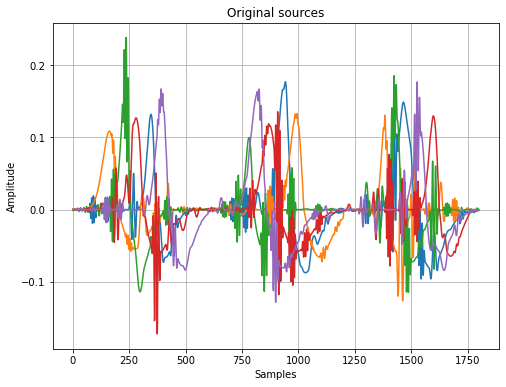

In [124]:
plt.figure(figsize=(8, 6))
plt.plot(S.T)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Original sources")
plt.grid()
plt.show()

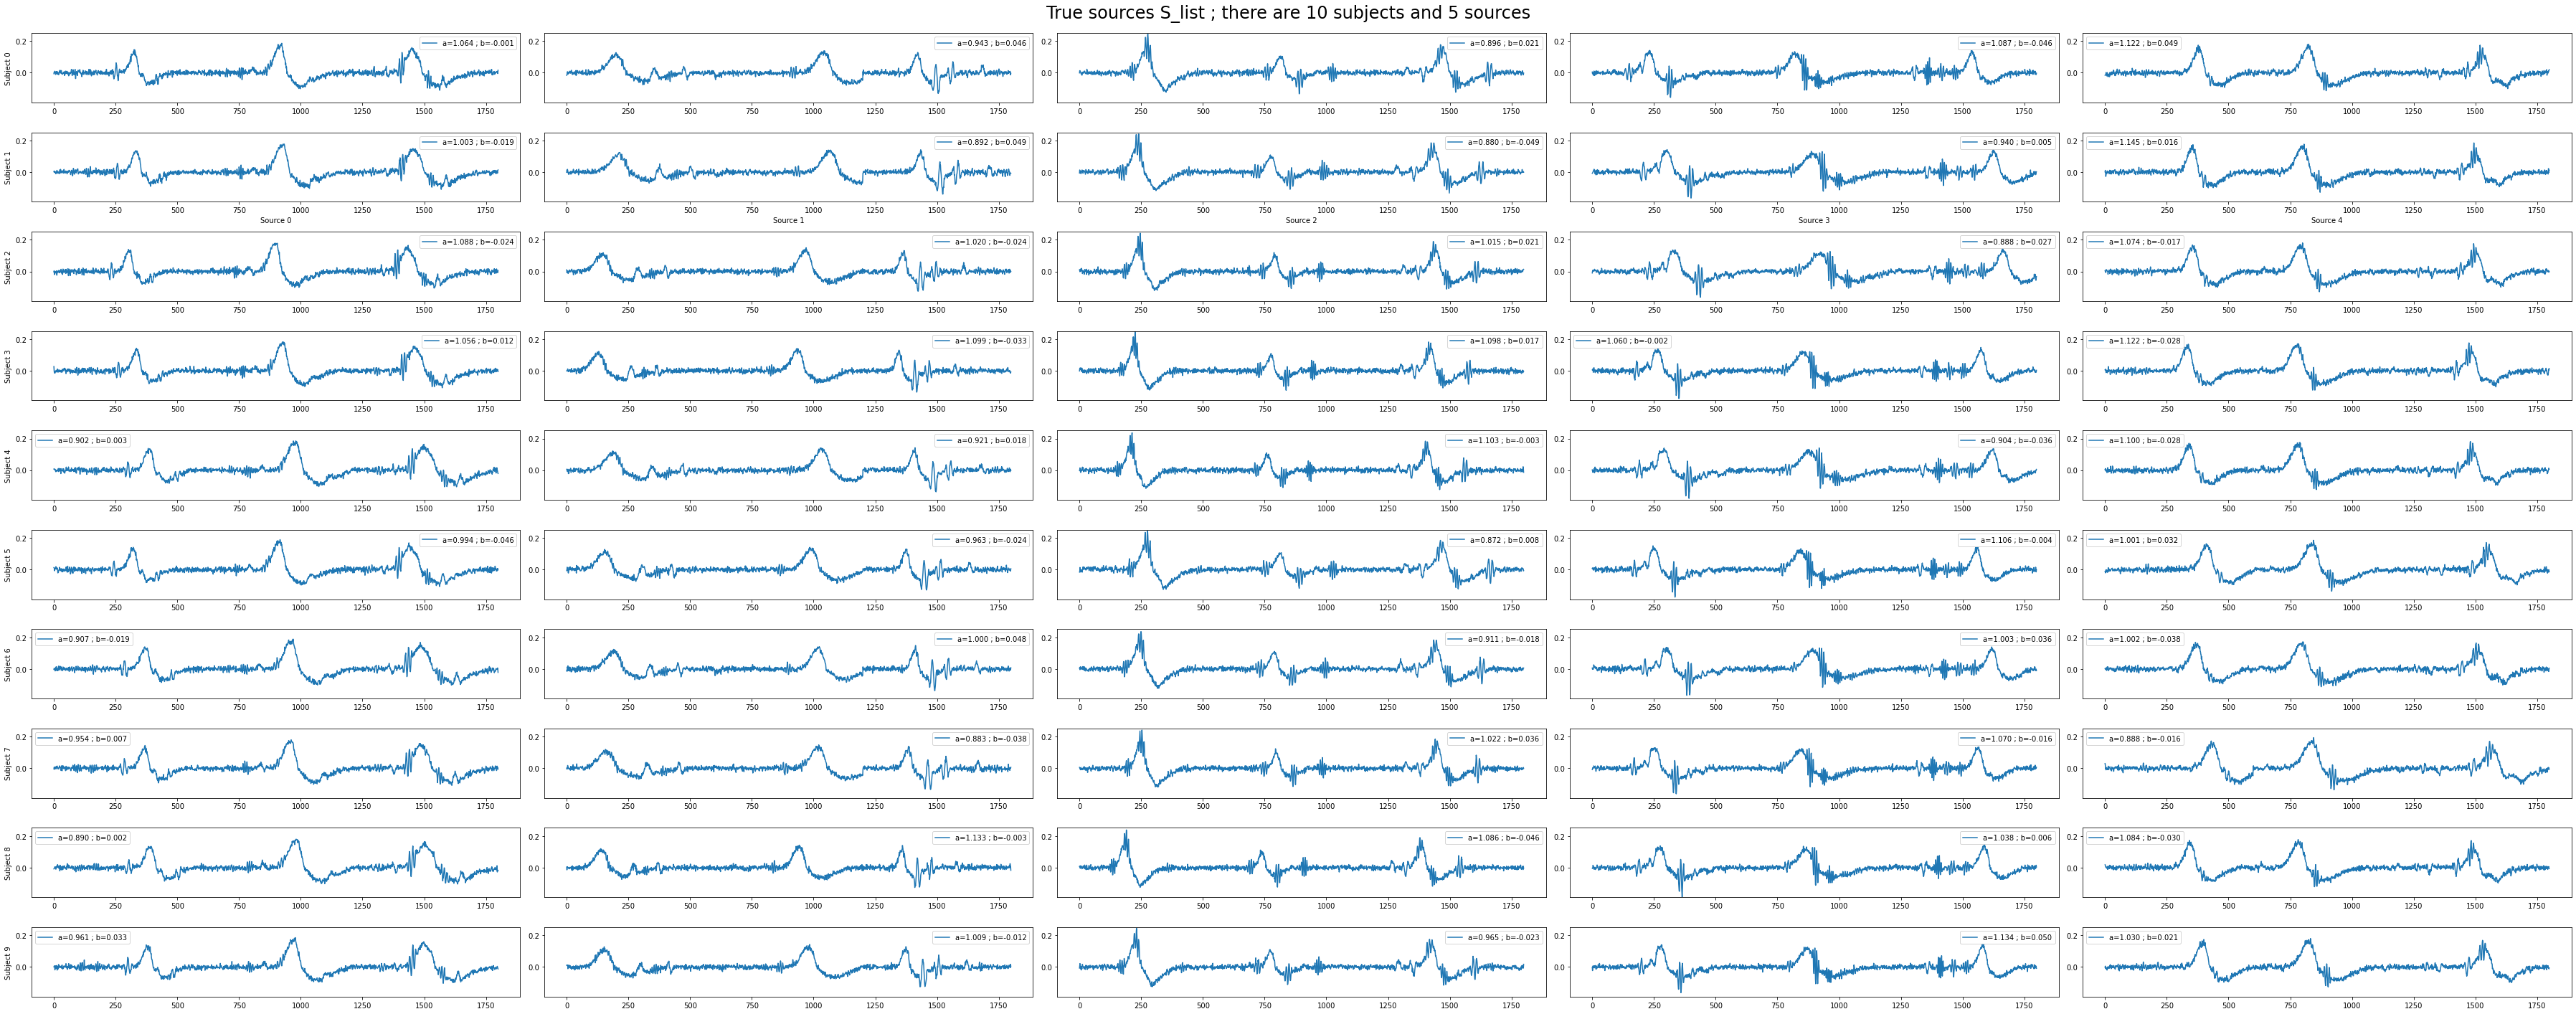

In [125]:
# plot true sources S_list
plt.subplots(m, p, figsize=(10*p, 2*m))

for i in range(m):
    for j in range(p):
        plt.subplot(m, p, p * i + j + 1)
        plt.plot(S_list[i, j], label=f'a={dilations[i, j]:.3f} ; b={shifts[i, j]:.3f}')
        plt.ylim([np.min(S_list), np.max(S_list)])
        if j == 0:
            plt.ylabel(f"Subject {i}")
        if i == 1:
            plt.xlabel(f"Source {j}")
        plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle(f"True sources S_list ; there are {m} subjects and {p} sources", fontsize=24)
plt.show()

# apply delay

In [9]:
def apply_dilations_shifts_4d(S, dilations, shifts, max_dilation=1., max_shift=0., shift_before_dilation=True):
    assert S.ndim == 4
    m, p, n_concat, n = S.shape
    assert dilations.shape == shifts.shape == (m, p)
    max_delay_time = (1 + max_shift) * max_dilation - 1
    max_delay_samples = np.ceil(max_delay_time * n).astype("int")
    t_extended = jnp.linspace(-max_delay_time, 1+max_delay_time, n+2*max_delay_samples)
    t = jnp.linspace(0, 1, n)
    T = jnp.array([t] * m * p * n_concat).reshape((m, p, n_concat, n))
    dilations_newaxis = dilations[:, :, np.newaxis, np.newaxis]
    shifts_newaxis = shifts[:, :, np.newaxis, np.newaxis]
    if shift_before_dilation:
        T_ds = (T - shifts_newaxis) * dilations_newaxis
    else:
        T_ds = T * dilations_newaxis - shifts_newaxis
    T_ds_ravel = T_ds.reshape((-1, n))
    S_extended = np.concatenate([S[:, :, :, n-max_delay_samples:], S, S[:, :, :, :max_delay_samples]], axis=-1)
    S_extended_ravel = S_extended.reshape((-1, n+2*max_delay_samples))
    interp_mapped = vmap(vmap(jnp.interp, (0, None, 0)), (1, None, None), out_axes=1)
    S_ds = interp_mapped(T_ds_ravel, t_extended, S_extended_ravel)
    S_ds = S_ds.reshape((m, p, n_concat, n))
    return S_ds

In [106]:
def apply_dilations_shifts(S, dilations, shifts, max_dilation=1., max_shift=0., shift_before_dilation=True):
    """Apply dilations and shifts to sources. 

    Args:
        S (nd.array): 
            The shape of sources is (p, n), (m, p, n), or (m, p, n_concat, n).
        dilations (nd.array): 
            There is one dilation factor for each source. So, dilations' shape is (p,) or (p, n).
        shifts (nd.array):
            There is one shift factor for each source. So, shifts' shape is (p,) or (p, n).
        max_dilation (float, optional): 
            Maximum dilation factor allowed. Dilations are in [1/max_dilation, max_dilation].
            Defaults to 1.
        max_shift (float, optional):
            Maximum shift factor allowed. Shifts are in [-max_shift, max_shift].
            Defaults to 0.
        shift_before_dilation (bool, optional):
            If True: apply shift before dilation.
            Else: apply dilation before shift.
            Defaults to True.

    Returns:
        S_ds (nd.array):
            Sources after applying dilations and shifts.
            Their shape is the same as S, i.e. (p, n), (m, p, n), or (m, p, n_concat, n).
    """
    assert (1 / max_dilation <= dilations).all() and (dilations <= max_dilation).all()
    assert (-max_shift <= shifts).all() and (shifts <= max_shift).all()
    if np.ndim(S) == 2:
        p, n = S.shape
        assert dilations.shape == shifts.shape == (p,)
        m_p_nconcat = p
    elif np.ndim(S) == 3:
        m, p, n = S.shape
        assert dilations.shape == shifts.shape == (m, p)
        m_p_nconcat = m * p
    elif np.ndim(S) == 4:
        m, p, n_concat, n = S.shape
        assert dilations.shape == shifts.shape == (m, p)
        m_p_nconcat = m * p * n_concat
    else:
        raise ValueError("The number of dimensions of S should be 2, 3 or 4.")
    max_delay_time = (1 + max_shift) * max_dilation - 1
    max_delay_samples = np.ceil(max_delay_time * n).astype("int")
    t_extended = jnp.linspace(-max_delay_time, 1+max_delay_time, n+2*max_delay_samples)
    t = jnp.linspace(0, 1, n)
    T = jnp.array([t] * m_p_nconcat).reshape(S.shape)
    if np.ndim(S) == 2 or np.ndim(S) == 3:
        dilations_newaxis = np.expand_dims(dilations, axis=-1)
        shifts_newaxis = np.expand_dims(shifts, axis=-1)
    else:
        dilations_newaxis = np.expand_dims(dilations, axis=(-1, -2))
        shifts_newaxis = np.expand_dims(shifts, axis=(-1, -2))
    if shift_before_dilation:
        T_ds = (T - shifts_newaxis) * dilations_newaxis
    else:
        T_ds = T * dilations_newaxis - shifts_newaxis
    T_ds_ravel = T_ds.reshape((-1, n))
    if np.ndim(S) == 2:
        S_extended = np.concatenate([S[:, n-max_delay_samples:], S, S[:, :max_delay_samples]], axis=-1)
    elif np.ndim(S) == 3:
        S_extended = np.concatenate([S[:, :, n-max_delay_samples:], S, S[:, :, :max_delay_samples]], axis=-1)
    else:
        S_extended = np.concatenate([S[:, :, :, n-max_delay_samples:], S, S[:, :, :, :max_delay_samples]], axis=-1)
    S_extended_ravel = S_extended.reshape((-1, n+2*max_delay_samples))
    interp_mapped = vmap(vmap(jnp.interp, (0, None, 0)), (1, None, None), out_axes=1)
    S_ds = interp_mapped(T_ds_ravel, t_extended, S_extended_ravel)
    S_ds = S_ds.reshape(S.shape)
    return S_ds

In [107]:
# test apply_dilations_shifts in 4d
S_4d = jnp.swapaxes(jnp.swapaxes(jnp.array(jnp.split(S_list, n_concat, axis=-1)), axis1=0, axis2=1), axis1=1, axis2=2)
S_4d_delayed = apply_dilations_shifts(
    S_4d, dilations, shifts, max_dilation=max_dilation, max_shift=max_shift, shift_before_dilation=True)
S_3d_delayed = S_4d_delayed.reshape((m, p, -1))

In [108]:
# test apply_dilations_shifts in 3d
S_3d_delayed = apply_dilations_shifts(
    S_list[:, :, :n], dilations, shifts, max_dilation=max_dilation, max_shift=max_shift, shift_before_dilation=True)

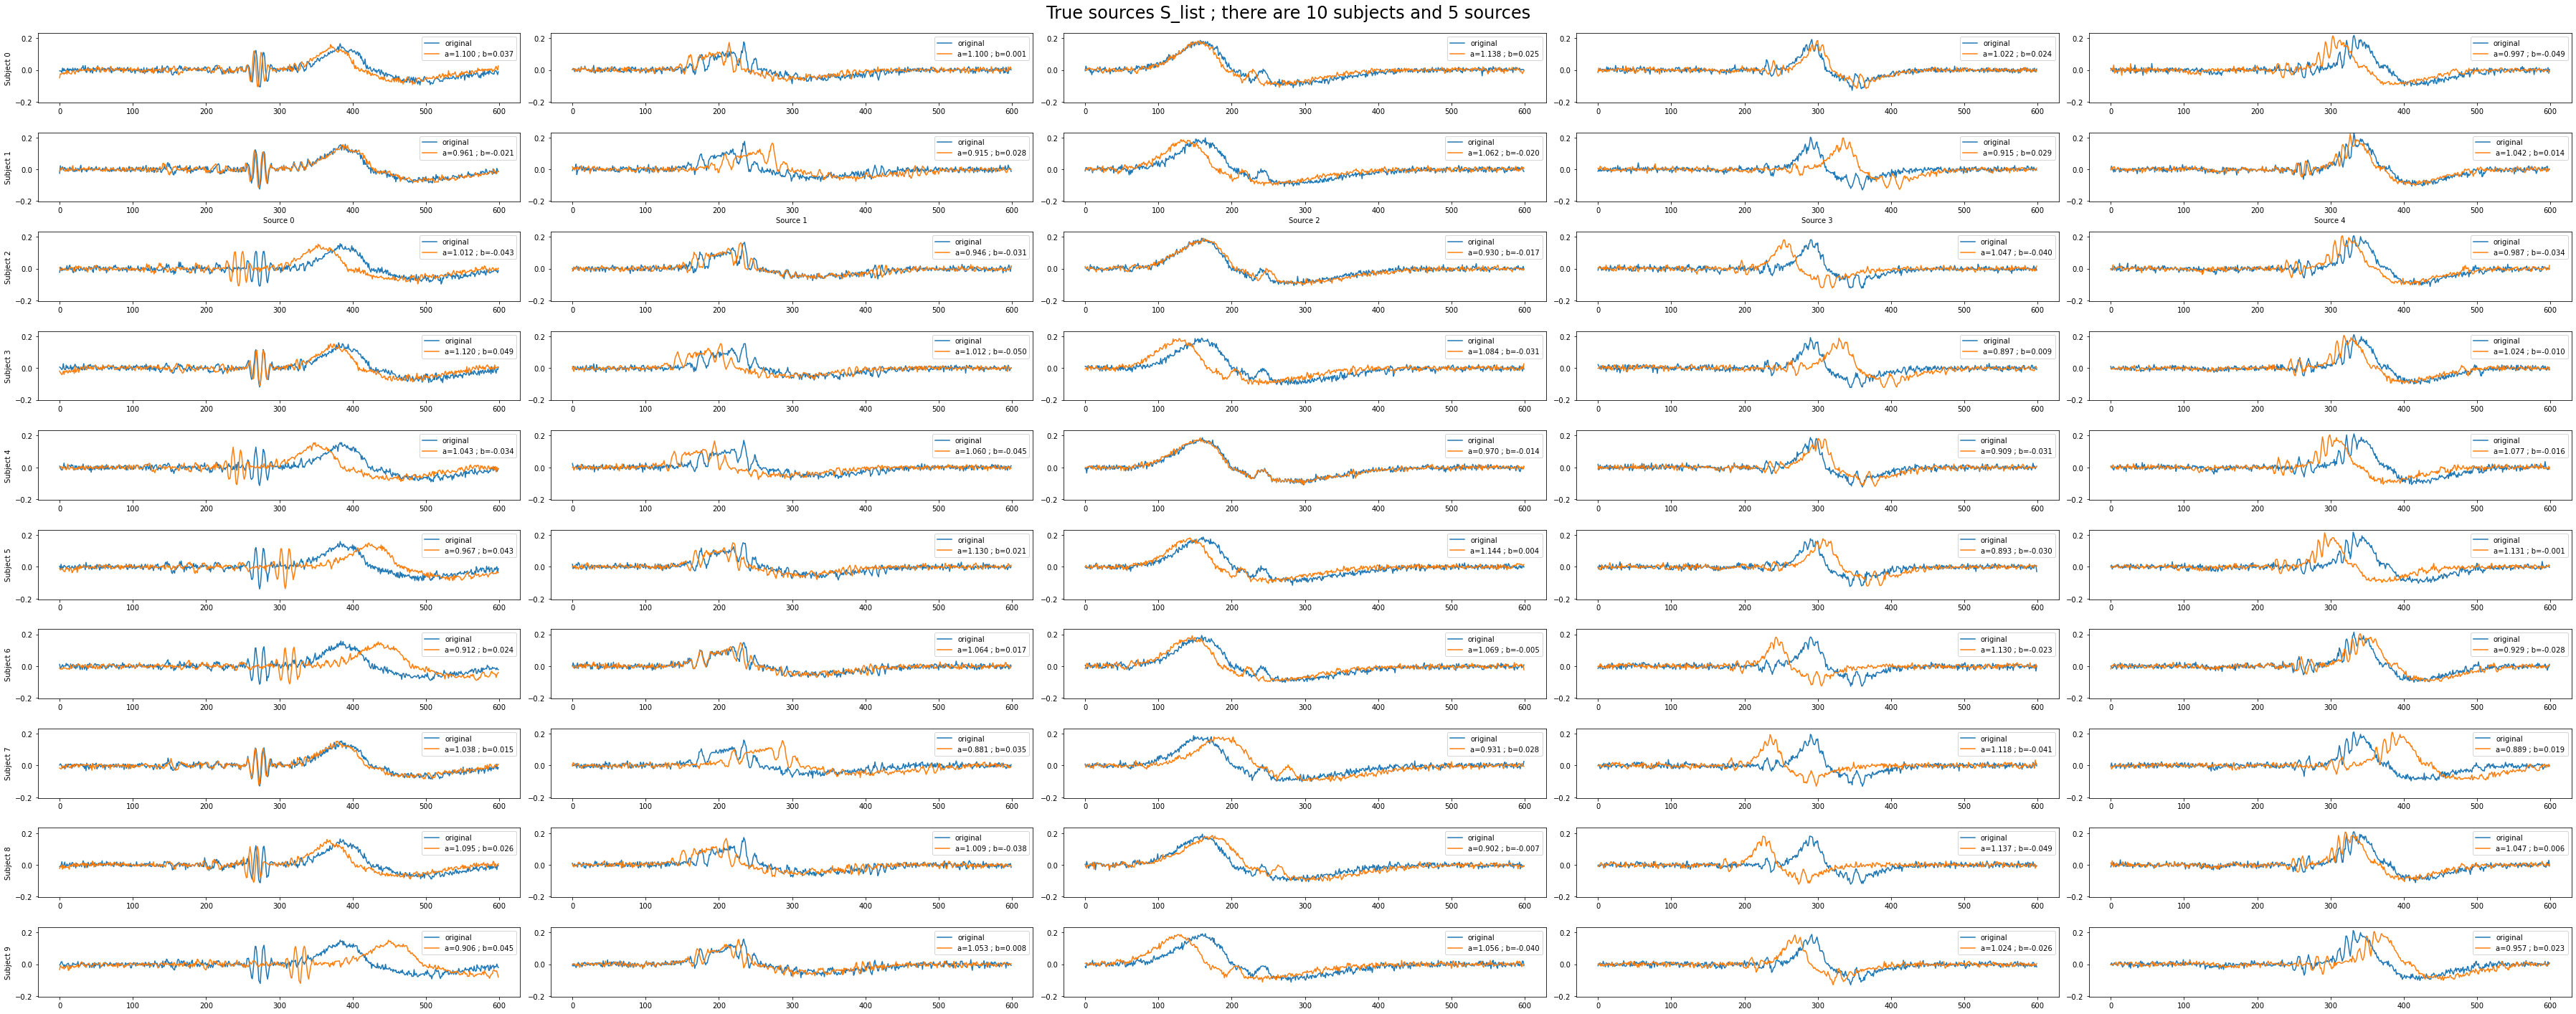

In [109]:
# plot original and delayed S_list
plt.subplots(m, p, figsize=(10*p, 2*m))

for i in range(m):
    for j in range(p):
        plt.subplot(m, p, p * i + j + 1)
        plt.plot(S_list[i, j, :n], label='original')
        plt.plot(S_3d_delayed[i, j, :n], label=f'a={dilations[i, j]:.3f} ; b={shifts[i, j]:.3f}')
        plt.ylim([np.min(S_list), np.max(S_list)])
        if j == 0:
            plt.ylabel(f"Subject {i}")
        if i == 1:
            plt.xlabel(f"Source {j}")
        plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle(f"True sources S_list ; there are {m} subjects and {p} sources", fontsize=24)
plt.show()

In [79]:
# test apply_dilations_shifts in 2d
subject = 0
S_2d_delayed = apply_dilations_shifts(
    S_list[subject, :, :n], dilations[subject], shifts[subject], max_dilation=max_dilation, max_shift=max_shift, shift_before_dilation=True)

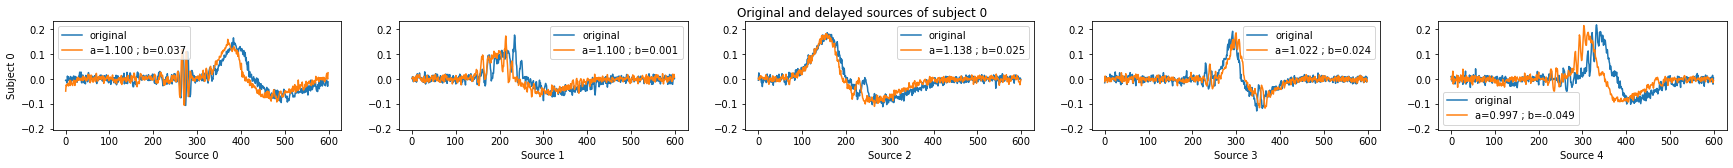

In [91]:
# plot original and delayed S_list
plt.subplots(1, p, figsize=(30, 2))

for i in range(p):
    plt.subplot(1, p, i + 1)
    plt.plot(S_list[subject, i, :n], label='original')
    plt.plot(S_2d_delayed[i, :n], label=f'a={dilations[subject, i]:.3f} ; b={shifts[subject, i]:.3f}')
    plt.ylim([np.min(S_list), np.max(S_list)])
    if i == 0:
        plt.ylabel(f"Subject {subject}")
    plt.xlabel(f"Source {i}")
    plt.legend()
plt.suptitle(f"Original and delayed sources of subject {subject}")
plt.show()

# execution time

In [110]:
def apply_both_delays_2d_cyclic(
    S,
    a,
    b,
    max_shift=0.,
    max_dilation=1.,
    shift_before_dilation=True,
    n_concat=1,
):
    p, n_total = S.shape
    n = n_total // n_concat
    max_delay = (1 + max_shift) * max_dilation - 1
    max_delay_samples = np.ceil(max_delay * n).astype("int")
    t_extended = jnp.linspace(-max_delay, 1+max_delay, n+2*max_delay_samples)
    t = jnp.linspace(0, 1, n)
    T = jnp.array([t] * p)
    if shift_before_dilation:
        T_ab = ((T.T - b) * a).T
        # T_ab = (T - b[:, np.newaxis]) * a[:, np.newaxis]
    else:
        T_ab = (T.T * a - b).T
    S_split = jnp.array(jnp.hsplit(S, n_concat))
    S_ab = jnp.zeros_like(S)
    for i in range(n_concat):
        S_i = S_split[i]
        S_extended = jnp.concatenate([S_i[:, n-max_delay_samples:], S_i, S_i[:, :max_delay_samples]], axis=1)
        S_ab = S_ab.at[:, i*n: (i+1)*n].set(
            jnp.array([jnp.interp(x=T_ab[i], xp=t_extended, fp=S_extended[i], left=0, right=0) 
                       for i in range(p)]))
    return S_ab

def apply_both_delays_3d_cyclic(
    S_list,
    A,
    B,
    max_shift=0.,
    max_dilation=1.,
    shift_before_dilation=True,
    n_concat=1,
):
    Y_list = jnp.array(
        [apply_both_delays_2d_cyclic(
            S_list[i], a=A[i], b=B[i], max_shift=max_shift, max_dilation=max_dilation, 
            shift_before_dilation=shift_before_dilation, n_concat=n_concat)
         for i in range(len(S_list))])
    return Y_list

In [111]:
start = time()
S_delayed_2 = apply_both_delays_3d_cyclic(
    S_list, dilations, shifts, max_dilation=max_dilation, max_shift=max_shift,
    shift_before_dilation=True, n_concat=n_concat)
print(f"previous method's time : {time() - start}")

previous method's time : 0.21453571319580078


In [112]:
start = time()
S_split_delayed = apply_dilations_shifts_4d(
    S_4d, dilations, shifts, max_dilation=max_dilation, max_shift=max_shift, shift_before_dilation=True)
print(f"vectorized method's time : {time() - start}")

vectorized method's time : 0.0390620231628418


In [113]:
n_it = 50
time_forloops = []
time_vectorize = []
for _ in range(n_it):
    S_list_3d = rng.randn(m, p, n_concat * n)
    S_list_4d = rng.randn(m, p, n_concat, n)
    dilations = rng.uniform(low=1/max_dilation, high=max_dilation, size=(m, p))
    shifts = rng.uniform(low=-max_shift, high=max_shift, size=(m, p))
    # for loops
    start = time()
    S_list_3d_delayed = apply_both_delays_3d_cyclic(
        S_list_3d, dilations, shifts, max_dilation=max_dilation, max_shift=max_shift,
        shift_before_dilation=True, n_concat=n_concat)
    time_forloops.append(time() - start)
    # vectorize
    start = time()
    S_list_4d_vectorize = apply_dilations_shifts_4d(
        S_list_4d, dilations, shifts, max_dilation=max_dilation, max_shift=max_shift, shift_before_dilation=True)
    time_vectorize.append(time() - start)

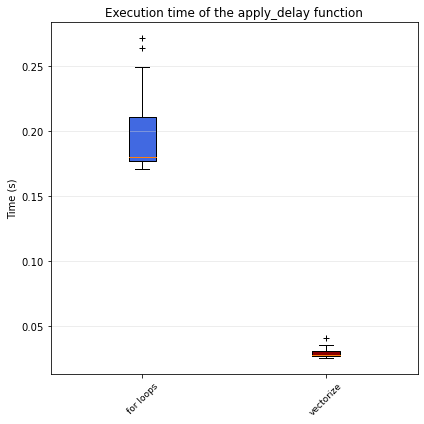

In [114]:
fig, ax = plt.subplots(figsize=(6, 6))

bp = ax.boxplot([time_forloops, time_vectorize])
ax.set(ylabel="Time (s)")
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
plt.setp(bp['fliers'], marker='+')
box_colors = ['royalblue', 'darkred']
for i in range(2):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    ax.add_patch(Polygon(box_coords, facecolor=box_colors[i]))
ax.set_xticklabels(['for loops', 'vectorize'], rotation=45, fontsize=9)
plt.title("Execution time of the apply_delay function")
plt.tight_layout()
plt.show()